In [108]:
from astropy.extern.six.moves.urllib import request
import sherpa.ui as ui
import numpy as np

url = 'http://python4astronomers.github.com/_downloads/3c273.fits'
open('3c273.fits', 'wb').write(request.urlopen(url).read())




46080

In [109]:
%matplotlib inline

In [ ]:
#ui.load_data('3c273.fits')
#print(ui.get_data)

In [110]:
from astropy.io import fits
dat = fits.open('3c273.fits')[1].data
wlen = dat.field('WAVELENGTH')
flux = dat.field('FLUX')
ui.load_arrays(1, wlen, flux)

In [111]:
ui.get_data().y.mean(),np.ptp(ui.get_data().y)

(4.3317031e-14, 9.125664e-14)

In [112]:
d1 = ui.get_data()
d1.y *= 1e14

In [113]:
ui.set_staterror(0.02,fractional=True)

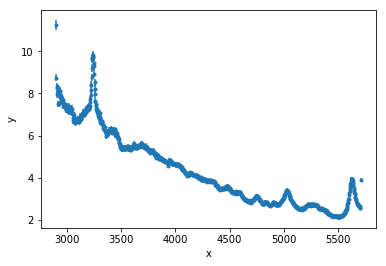

In [114]:
ui.plot_data()

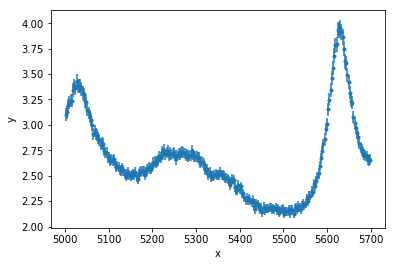

In [115]:
ui.notice(5000,5700)
ui.plot_data()

In [116]:
ui.set_source(ui.powlaw1d.pow1)
pow1.ref = 4000.0
print(pow1)

powlaw1d.pow1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   pow1.gamma   thawed      1.18167          -10           10           
   pow1.ref     frozen         4000 -3.40282e+38  3.40282e+38           
   pow1.ampl    thawed      3.47678            0  3.40282e+38           


In [117]:
ui.get_stat()

Chi Squared with Gehrels variance.

    The variance is estimated from the number of counts in each bin,
    but unlike `Chi2DataVar`, the Gaussian approximation is not
    used. This makes it more-suitable for use with low-count data.

    The standard deviation for each bin is calculated using the
    approximation from [1]_:

    sigma(i,S) = 1 + sqrt(N(i,s) + 0.75)

    where the higher-order terms have been dropped. This is accurate
    to approximately one percent. For data where the background has
    not been subtracted then the error term is:

    sigma(i) = sigma(i,S)

    whereas with background subtraction,

    sigma(i)^2 = sigma(i,S)^2 + [A(S)/A(B)]^2 sigma(i,B)^2

    Notes
    -----
    The accuracy of the error term when the background has been
    subtracted has not been determined. A preferable approach to
    background subtraction is to model the background as well as the
    source signal.

    References
    ----------

    .. [1] "Confidence limits for small num

In [123]:
ui.notice()
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 21337.6
Final fit statistic   = 21337.6 at function evaluation 3
Data points           = 1024
Degrees of freedom    = 1022
Probability [Q-value] = 0
Reduced statistic     = 20.8783
Change in statistic   = 0
   pow1.gamma     1.96614     
   pow1.ampl      4.41533     


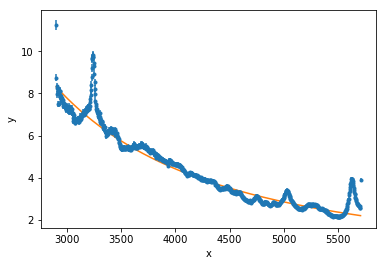

In [124]:

ui.plot_fit()

In [125]:
print(ui.get_fit_results())

datasets       = (1,)
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('pow1.gamma', 'pow1.ampl')
parvals        = (1.9661379126783924, 4.4153292922195497)
statval        = 21337.578852803304
istatval       = 21337.578852803304
dstatval       = 0.0
numpoints      = 1024
dof            = 1022
qval           = 0.0
rstat          = 20.87825719452378
message        = successful termination
nfev           = 3


In [126]:
#ui.show_fit()

In [127]:
for n in range(1,5):
    ui.create_model_component("gauss1d","g{}".format(n))
ui.set_source(pow1+g1+g2+g3+g4)
ui.get_source()


<BinaryOpModel model instance '((((powlaw1d.pow1 + gauss1d.g1) + gauss1d.g2) + gauss1d.g3) + gauss1d.g4)'>

In [181]:
g1.pos=3250
g2.pos=5000
g3.pos=5040
g4.pos=5640

for p in [g1,g2,g3,g4]:
    p.fwhm=50

In [182]:
ui.notice()
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 11495.5
Final fit statistic   = 9313.24 at function evaluation 101
Data points           = 1024
Degrees of freedom    = 1018
Probability [Q-value] = 0
Reduced statistic     = 9.14856
Change in statistic   = 2182.26
   pow1.gamma     2.00397     
   pow1.ampl      4.33969     
   g1.fwhm        26.0916     
   g1.pos         3239.86     
   g1.ampl        2.38199     
   g1broad.ampl   0.309433    


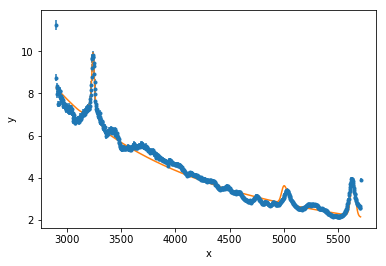

In [183]:
ui.plot_fit()

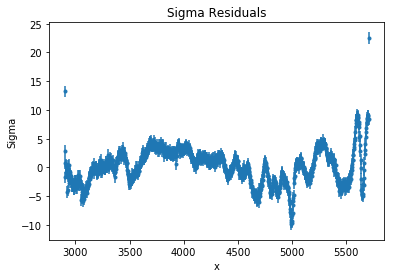

In [184]:
ui.plot_delchi()

In [185]:
ui.gauss1d.g1broad
g1broad.pos = g1.pos
g1broad.fwhm = g1.fwhm * 4
ui.set_source(ui.get_source() + g1broad)

In [186]:
print(ui.get_source())

((((((((powlaw1d.pow1 + gauss1d.g1) + gauss1d.g2) + gauss1d.g3) + gauss1d.g4) + gauss1d.g1broad) + gauss1d.g1broad) + gauss1d.g1broad) + gauss1d.g1broad)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   pow1.gamma   thawed      2.00397          -10           10           
   pow1.ref     frozen         4000 -3.40282e+38  3.40282e+38           
   pow1.ampl    thawed      4.33969            0  3.40282e+38           
   g1.fwhm      thawed      26.0916  1.17549e-38  3.40282e+38           
   g1.pos       thawed      3239.86 -3.40282e+38  3.40282e+38           
   g1.ampl      thawed      2.38199 -3.40282e+38  3.40282e+38           
   g2.fwhm      frozen           50  1.17549e-38  3.40282e+38           
   g2.pos       frozen         5000 -3.40282e+38  3.40282e+38           
   g2.ampl      frozen     0.757185 -3.40282e+38  3.40282e+38           
   g3.fwhm      frozen           50  1.1754

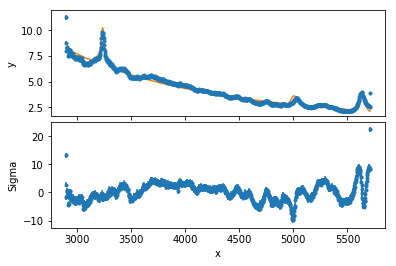

In [187]:
ui.plot_fit_delchi()

In [188]:
ui.freeze(g2, g3, g4)
ui.ignore(3360, 4100)
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 7513.34
Final fit statistic   = 6760.26 at function evaluation 76
Data points           = 755
Degrees of freedom    = 749
Probability [Q-value] = 0
Reduced statistic     = 9.02572
Change in statistic   = 753.073
   pow1.gamma     1.93297     
   pow1.ampl      4.23794     
   g1.fwhm        30.8991     
   g1.pos         3239.91     
   g1.ampl        2.20327     
   g1broad.ampl   0.283823    


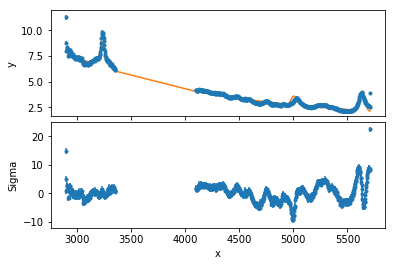

In [189]:
ui.plot_fit_delchi()

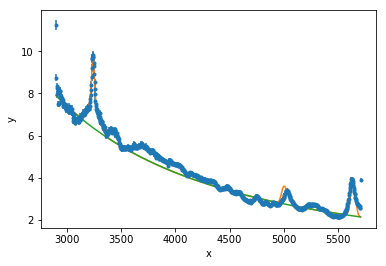

In [190]:
ui.notice(3000, 5700)
ui.plot_fit()
ui.plot_model_component(pow1, overplot=True)

In [191]:
ui.notice()

In [192]:
ui.notice(4900,5150)

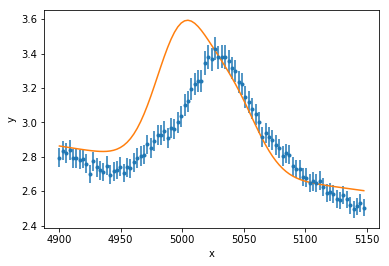

In [193]:
ui.plot_fit()

In [194]:
ui.freeze(g1,g1broad,g3,g4)
ui.thaw(g2)
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 1049.41
Final fit statistic   = 61.0561 at function evaluation 85
Data points           = 91
Degrees of freedom    = 86
Probability [Q-value] = 0.980905
Reduced statistic     = 0.709955
Change in statistic   = 988.353
   pow1.gamma     1.56691     
   pow1.ampl      3.81481     
   g2.fwhm        76.7888     
   g2.pos         5019.52     
   g2.ampl        0.355755    


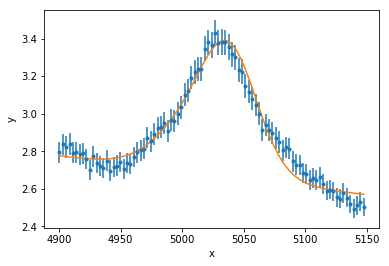

In [198]:
ui.plot_fit()
ui.plot_data()
ui.plot_model(overplot=True)

In [199]:
ui.get_fit_results().rstat

0.709954805836135

In [201]:
ui.conf()

pow1.gamma lower bound:	-0.164594
g2.fwhm lower bound:	-6.63191
g2.ampl lower bound:	-0.0186894
pow1.gamma upper bound:	0.164594
g2.ampl upper bound:	0.0186894
g2.pos lower bound:	-2.06172
g2.fwhm upper bound:	7.26759
pow1.ampl lower bound:	-0.140297
g2.pos upper bound:	2.16901
pow1.ampl upper bound:	0.145335
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   pow1.gamma        1.56691    -0.164594     0.164594
   pow1.ampl         3.81481    -0.140297     0.145335
   g2.fwhm           76.7888     -6.63191      7.26759
   g2.pos            5019.52     -2.06172      2.16901
   g2.ampl          0.355755   -0.0186894    0.0186894


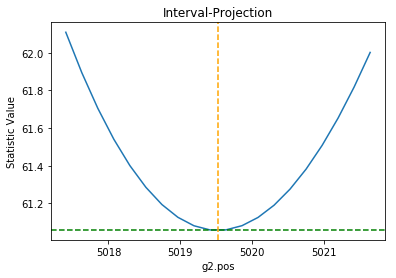

In [202]:
ui.int_proj(g2.pos)

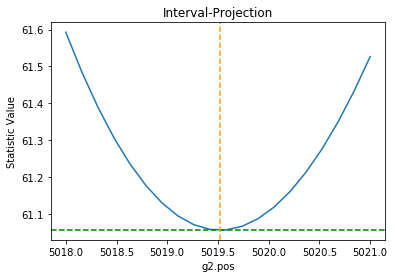

In [203]:
ui.int_proj(g2.pos,min=5018,max=5021)

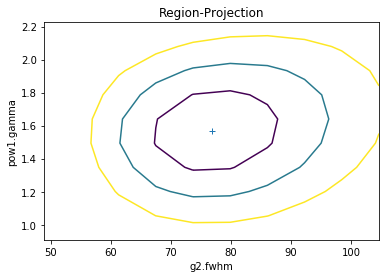

In [204]:
ui.reg_proj(g2.fwhm,pow1.gamma)

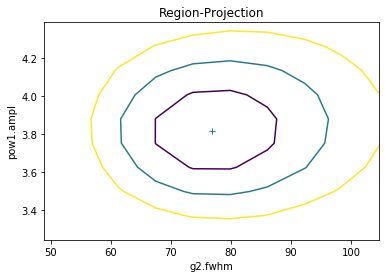

In [205]:
ui.reg_proj(g2.fwhm,pow1.ampl)

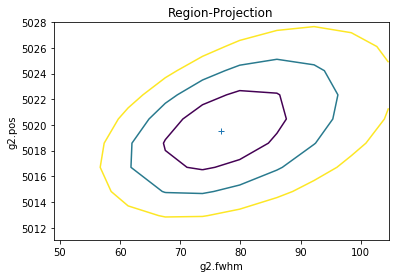

In [206]:
ui.reg_proj(g2.fwhm,g2.pos)

In [ ]:
###2d fitting in Sherpa

In [223]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
from astropy.extern.six.moves.urllib import request
url = "http://python4astronomers.github.com/_downloads/image2.fits"
open("image1.fits", "wb").write(request.urlopen(url).read())


195840

In [254]:
from sherpa.astro.ui import *
import pyds9
from pyds9 import *

In [218]:
load_data("image2.fits")
print(get_data())

name      = image2.fits
x0        = Float64[56376]
x1        = Float64[56376]
y         = Int16[56376]
shape     = (216, 261)
staterror = None
syserror  = None
sky       = physical
 crval    = [ 3798.5, 4019.5]
 crpix    = [ 0.5, 0.5]
 cdelt    = [ 2., 2.]
eqpos     = world
 crval    = [ 278.386 , -10.5899]
 crpix    = [ 4096.5, 4096.5]
 cdelt    = [-0.0001, 0.0001]
 crota    = 0
 epoch    = 2000
 equinox  = 2000
coord     = logical


In [225]:
calc_data_sum2d()

32300

In [226]:
set_stat("cash")

In [227]:
set_method("simplex")

In [228]:
set_coord("physical")

In [229]:
notice2d("CIRCLE(4072.46,4249.34,108)")
print(get_filter())

Circle(4072.46,4249.34,108)


In [235]:
image_data()

In [243]:
ignore2d()
with open("circle.reg", "w") as f:
    f.write("CIRCLE(4072.46,4249.34,108)\n")
    f.close()
notice2d("circle.reg")
image_data()

In [240]:
ls cir*

circle.reg


In [244]:
calc_data_sum2d("CIRCLE(4072.46,4249.34,108)")

24658

In [245]:
set_source(gauss2d.g1)
g1.ampl = 20
g1.fwhm = 20
g1.xpos = 4065.5
g1.ypos = 4250.5

In [246]:
g1.fwhm.max = 4300
g1.xpos.max = 4300
g1.ypos.max = 4300
g1.ampl.min = 1
g1.ampl.max = 1000

In [247]:
print(get_source())
gauss2d.g1

gauss2d.g1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   g1.fwhm      thawed           20  1.17549e-38         4300           
   g1.xpos      thawed       4065.5 -3.40282e+38         4300           
   g1.ypos      thawed       4250.5 -3.40282e+38         4300           
   g1.ellip     frozen            0            0        0.999           
   g1.theta     frozen            0     -6.28319      6.28319    radians
   g1.ampl      thawed           20            1         1000           


<Gauss2D model instance 'gauss2d.g1'>

In [255]:
d=DS9()


ValueError: no active ds9 running for target: ds9

In [256]:
image_model()

In [257]:
calc_model_sum2d("CIRCLE(4072.46,4249.34,108)")

2266.1800709135969

In [258]:
set_source(g1+const2d.bgnd)
bgnd.c0 = 0.2
bgnd.c0.max = 100

In [259]:
print(get_source())

(gauss2d.g1 + const2d.bgnd)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   g1.fwhm      thawed           20  1.17549e-38         4300           
   g1.xpos      thawed       4065.5 -3.40282e+38         4300           
   g1.ypos      thawed       4250.5 -3.40282e+38         4300           
   g1.ellip     frozen            0            0        0.999           
   g1.theta     frozen            0     -6.28319      6.28319    radians
   g1.ampl      thawed           20            1         1000           
   bgnd.c0      thawed          0.2 -3.40282e+38          100           


In [260]:
fit()

Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 20661.5
Final fit statistic   = -48907.8 at function evaluation 529
Data points           = 9171
Degrees of freedom    = 9166
Change in statistic   = 69569.3
   g1.fwhm        57.9477     
   g1.xpos        4070.4      
   g1.ypos        4251.11     
   g1.ampl        23.3562     
   bgnd.c0        0.266365    


In [263]:
image_fit?